[video link](https://www.youtube.com/watch?v=7O4dpR9QMIM&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t&index=5)

## Upload the data

Imports necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

upload the data

In [2]:
df = pd.read_csv("data\clean\Data_Engineer\Data_Engineer_15-04-2023.csv", index_col=0, header=[0, 1])

In [3]:
# choose relevant columns
df.columns.tolist()


[('Job_details', 'Title'),
 ('Job_details', 'Description'),
 ('Job_details', 'Is_contract'),
 ('Job_details', 'Seniority'),
 ('Job_details', 'City'),
 ('Job_details', 'State'),
 ('Job_details', 'Country'),
 ('Job_details', 'Region'),
 ('Job_details', 'Job_age'),
 ('Job_details', 'Easy_apply'),
 ('Salary', 'Min'),
 ('Salary', 'Max'),
 ('Salary', 'Avg'),
 ('Salary', 'Currency'),
 ('Salary', 'Employer_provided'),
 ('Salary', 'Is_hourly'),
 ('Salary', 'Specified'),
 ('Company_info', 'Name'),
 ('Company_info', 'Rating'),
 ('Company_info', 'Employees'),
 ('Company_info', 'Type_of_ownership'),
 ('Company_info', 'Sector'),
 ('Company_info', 'Industry'),
 ('Company_info', 'Company_age'),
 ('Company_info', 'Revenue_USD'),
 ('Company_info', 'Friend_recommend'),
 ('Company_info', 'CEO_approval'),
 ('Company_info', 'Career_opportunities'),
 ('Company_info', 'Comp_&_benefits'),
 ('Company_info', 'Senior_management'),
 ('Company_info', 'Work/Life_balance'),
 ('Company_info', 'Culture_&_values'),
 ('C

### Select the relevant data 

In [4]:
df_model = pd.DataFrame()

columns_to_move = [
    ('Job_details', 'Country'),
    ('Job_details', 'Seniority'),
    ('Job_details', 'Job_age'),
    ('Salary', 'Avg'),
    ('Salary', 'Employer_provided'),
    ('Salary', 'Is_hourly'),
    ('Company_info', 'Rating'),
    ('Company_info', 'Employees'),
    ('Company_info', 'Type_of_ownership'),
    ('Company_info', 'Sector'),
    ('Company_info', 'Company_age'),
    ('Company_info', 'Revenue_USD'),
    ('Programming_languages', 'SQL'),
    ('Programming_languages', 'Python'),
    ('Programming_languages', 'Java'),
    ('Programming_languages', 'Scala'),
    ('Cloud_platforms', 'Microsoft_Azure'),
    ('Cloud_platforms', 'AWS'),
    ('Cloud_platforms', 'GPC'),
    ('Data_integration_and_processing', 'Databricks'),
    ('Search_&_Analytics', 'Snowflake'),
    ('Stream_processing_tools', 'Apache_Kafka')
]

extracted_columns = df.loc[:, columns_to_move]

extracted_columns.columns = extracted_columns.columns.droplevel(0)

extracted_columns = extracted_columns.rename(columns={'Avg': 'Salary_avg'})

df_model[extracted_columns.columns] = extracted_columns

df_model.columns


Index(['Country', 'Seniority', 'Job_age', 'Salary_avg', 'Employer_provided',
       'Is_hourly', 'Rating', 'Employees', 'Type_of_ownership', 'Sector',
       'Company_age', 'Revenue_USD', 'SQL', 'Python', 'Java', 'Scala',
       'Microsoft_Azure', 'AWS', 'GPC', 'Databricks', 'Snowflake',
       'Apache_Kafka'],
      dtype='object')

In [5]:
bi_subcolumns = df['Business_Intelligence_Tools'].columns

is_true = df['Business_Intelligence_Tools'][bi_subcolumns].any(axis=1)
df_model['BI_Tools'] = is_true.astype(bool)

In [6]:
# To avoid bugs with infinitive values
df_model = df_model.fillna(-1)

In [7]:
df_model.head()

,Country,Seniority,Job_age,Salary_avg,Employer_provided,Is_hourly,Rating,Employees,Type_of_ownership,Sector,...,Python,Java,Scala,Microsoft_Azure,AWS,GPC,Databricks,Snowflake,Apache_Kafka,BI_Tools
0,Australia,-1,7,-1.0,False,-1,4.2,51 to 200,Company - Private,"Energy, Mining & Utilities",...,False,False,False,False,False,False,False,False,False,False
1,Australia,-1,2,82033.5,False,False,3.7,501 to 1000,Company - Public,Telecommunications,...,False,False,False,False,False,False,False,False,False,False
2,Australia,-1,14,61017.0,True,False,3.9,-1,-1,-1,...,False,False,False,False,False,False,False,False,False,False
3,Australia,-1,2,-1.0,False,-1,3.3,10000+,Company - Private,Retail & Wholesale,...,False,False,False,False,False,False,False,False,False,False
4,Australia,-1,17,73898.0,False,False,3.3,1001 to 5000,Company - Public,Financial Services,...,False,False,False,False,False,False,False,False,False,False


## Get dummy data

Transforms categorical variables into numerical form by creating binary indicator variables for each category, resulting in a new DataFrame called 'df_dum'

In [8]:
df_dum = pd.get_dummies(df_model)

In [9]:
df_dum.columns

Index(['Job_age', 'Salary_avg', 'Employer_provided', 'Rating', 'Company_age',
       'SQL', 'Python', 'Java', 'Scala', 'Microsoft_Azure',
       ...
       'Revenue_USD_-1', 'Revenue_USD_$1 to $5 billion',
       'Revenue_USD_$1 to $5 million', 'Revenue_USD_$10+ billion',
       'Revenue_USD_$100 to $500 million', 'Revenue_USD_$25 to $100 million',
       'Revenue_USD_$5 to $10 billion', 'Revenue_USD_$5 to $25 million',
       'Revenue_USD_$500 million to $1 billion',
       'Revenue_USD_Less than $1 million'],
      dtype='object', length=111)

## Train the split
Splits the data into two separate datasets, one for training the model and the other for testing its performance, using the train_test_split function from scikit-learn.

In [10]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('Salary_avg', axis =1)
y = df_dum['Salary_avg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
my_xnames = X.columns

new_index = pd.Index(["Salary_avg"])

my_xnames = pd.Index(new_index.tolist() + my_xnames.tolist())

## Multiple linear regression
Utilizes the OLS method from the statsmodels library to estimate the relationship between multiple independent variables and a dependent variable through linear regression.

In [12]:
import statsmodels.api as sm

X = np.asarray(X)
y = np.asarray(y)

X = np.nan_to_num(X)
y = np.nan_to_num(y)

X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X_sm = X = sm.add_constant(X)

model = sm.OLS(y,X_sm)
model.data.xnames = my_xnames.tolist()

In [13]:
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     230.7
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:47:42   Log-Likelihood:                -32637.
No. Observations:                2963   AIC:                         6.548e+04
Df Residuals:                    2859   BIC:                         6.611e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Salary_avg                                          3.167e+04   1462.040     21.658      0.000    2.88e+04    3.45e+04
Job_age                                               25.6938     27.034      0.950      0.342     -27.315      78.702
Employer_provided                                   1648.0476   1439.012      1.145      0.252   -1173.559    4469.655
Rating                                               -62.1101    213.725     -0.291      0.771    -481.180     356.960
Company_age                                           -3.2130      8.752     -0.367      0.714     -20.373      13.947
SQL                                                 -469.8951    902.026     -0.521      0.602   -2238.583    1298.792
Python                                              1476.2597    932.046      1.584      0.113    -351.290    3303.810
Java                                               -1485.5759   1469.122     -1.011      0.312   -4366.222    1395.070
Scala                                                -64.5612   1650.812     -0.039      0.969   -3301.463    3172.341
Microsoft_Azure                                     -942.2741    992.236     -0.950      0.342   -2887.844    1003.296
AWS                                                  925.1054   1022.798      0.904      0.366   -1080.390    2930.601
GPC                                                  705.5236   1514.962      0.466      0.641   -2265.005    3676.052
Databricks                                           818.0754   1619.894      0.505      0.614   -2358.204    3994.355
Snowflake                                           2497.3413   1767.926      1.413      0.158    -969.197    5963.879
Apache_Kafka                                        2270.9934   1590.981      1.427      0.154    -848.592    5390.579
BI_Tools                                            2955.4562   1411.825      2.093      0.036     187.158    5723.755
Country_Australia                                   6907.6263   1989.175      3.473      0.001    3007.264    1.08e+04
Country_Austria                                     1085.6700   1398.669      0.776      0.438   -1656.831    3828.171
Country_Belgium                                      606.5155   1981.607      0.306      0.760   -3279.008    4492.039
Country_Canada                                     -1.229e+04   7374.489     -1.666      0.096   -2.67e+04    2170.907
Country_Czech Republic                             -1709.9745   1851.452     -0.924      0.356   -5340.290    1920.341
Country_Denmark                                      374.3174   1689.174      0.222      0.825   -2937.806    3686.440
Country_Finland                                     1364.3552   2026.268      0.673      0.501   -2608.740  

```
                        coef	        std err	        t	P>|t|	[0.025	        0.975]
BI_Tools	        2955.4562	1411.825	2.093	0.036	 187.158	5723.755
Python	                1476.2597	932.046	        1.584	0.113	-351.290	3303.810
Snowflake	        2497.3413	1767.926	1.413	0.158	-969.197	5963.879
Employer_provided	1648.0476	1439.012	1.145	0.252	-1173.559	4469.655
AWS	                925.1054	1022.798	0.904	0.366	-1080.390	2930.601
GPC	                705.5236	1514.962	0.466	0.641	-2265.005	3676.052
```

In [19]:
from statsmodels.iolib.table import SimpleTable

def get_t_results(results, t_cap):
    table_index = 1

    table_data = results.tables[table_index].data

    filtered_data = [row for row in table_data if float(row[-2].replace("[", "")) >= t_cap]

    sorted_data = sorted(filtered_data, key=lambda x: float(x[-2].replace("[", "")), reverse=True)

    filtered_table = SimpleTable(sorted_data, title=results.tables[table_index].title)

    return filtered_table

get_t_results(results, 0.05)

Is_hourly_True,6.68e+04,1382.898,48.307,0.000,6.41e+04,6.95e+04
Salary_avg,3.167e+04,1462.040,21.658,0.000,2.88e+04,3.45e+04
Country_United States,2.452e+04,1262.411,19.422,0.000,2.2e+04,2.7e+04
Is_hourly_False,1.926e+04,847.306,22.728,0.000,1.76e+04,2.09e+04
Country_Switzerland,2.096e+04,2086.198,10.047,0.000,1.69e+04,2.51e+04
Seniority_Senior,9084.1922,1014.187,8.957,0.000,7095.581,1.11e+04
Seniority_-1,7041.6797,892.455,7.890,0.000,5291.760,8791.599
Country_Australia,6907.6263,1989.175,3.473,0.001,3007.264,1.08e+04
Seniority_Management,7178.9720,2201.220,3.261,0.001,2862.833,1.15e+04
Employees_-1,4805.2406,1043.086,4.607,0.000,2759.963,6850.518
Revenue_USD_$1 to $5 billion,4998.1928,1242.626,4.022,0.000,2561.660,7434.726


In [22]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-54601102342.482185

## lasso regression

In [35]:
lm_l = Lasso(alpha=.31)
lm_l.fit(X_train,y_train)
avg_score = np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
avg_score

-7897.964748191094

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e+10, tolerance: 3.145e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.030e+10, tolerance: 3.180e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

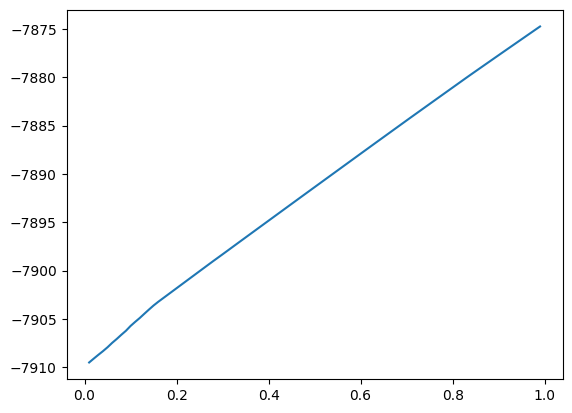

In [38]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [40]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-7874.747452


## Random Forest 

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-4752.391187113221

## Tune Models GridsearchCV 

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('friedman_mse','absolute_error', 'poisson', 'squared_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\karol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `ma

RandomForestRegressor(criterion='absolute_error', max_features='auto',
                      n_estimators=110)

## test ensembles 

In [45]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(f"tpred_lm: {mean_absolute_error(y_test,tpred_lm)}")
print(f"tpred_lml: {mean_absolute_error(y_test,tpred_lml)}")
print(f"tpred_rf: {mean_absolute_error(y_test,tpred_rf)}")

print(f"tpred_lm + tpred_rf: {mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)}")
print(f"tpred_lm + tpred_lml: {mean_absolute_error(y_test,(tpred_lm+tpred_lml)/2)}")
print(f"tpred_rf + tpred_lml: {mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)}")

tpred_lm: 7901.305438448567
tpred_lml: 7892.8111266615015
tpred_rf: 5070.912636057029
tpred_lm + tpred_rf: 6157.596818948337
tpred_lm + tpred_lml: 7897.02006972845
tpred_rf + tpred_lml: 6152.418084018237
